In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score, f1_score

import joblib
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# Basic information of the Iris Dataset
print("Shape of Iris dataframe : ")
print(df.shape)
print()

print("Data types of each column in the Iris dataframe: ")
print(df.dtypes)
print()

print("Invoking the info() method on the Iris dataframe:")
print(df.info())
print()

print("Invoking the describe() method on the Iris dataframe:")
print(df.describe())
print()

Shape of Iris dataframe : 
(150, 5)

Data types of each column in the Iris dataframe: 
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

Invoking the info() method on the Iris dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Invoking the describe() method on the Iris dataframe:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.43586

In [5]:
df.isna().sum().any()

False

In [6]:
print(df['species'].nunique())
print(df['species'].unique())

3
['setosa' 'versicolor' 'virginica']


In [7]:
df['species'] = df['species'].astype('category')
df.dtypes

sepal_length     float64
sepal_width      float64
petal_length     float64
petal_width      float64
species         category
dtype: object

In [8]:
df.shape

(150, 5)

In [9]:
le = LabelEncoder()
df['Species_encoded'] = le.fit_transform(df['species'])
df

,sepal_length,sepal_width,petal_length,petal_width,species,Species_encoded
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [10]:
df.drop(columns = ['species'], inplace = True)
df.shape

(150, 5)

In [11]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,Species_encoded
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
df['Species_encoded'].unique()

array([0, 1, 2])

In [13]:
df[df['Species_encoded'] == 0].shape

(50, 5)

In [14]:
X = df.drop(['Species_encoded'], axis = 1) # Features
X.shape

(150, 4)

In [15]:
y = df['Species_encoded'] # Target (Output) variable
y.shape

(150,)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [17]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [18]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [19]:
model.score(X_test,y_test)

1.0

In [20]:
y_train_predicted = model.predict(X_train)
print(y_train_predicted)

print()
print(y_train_predicted.shape)

[0 0 1 0 0 2 1 0 0 0 2 1 1 0 0 1 1 2 1 2 1 2 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1
 2 0 1 2 0 2 2 1 1 2 1 0 1 2 0 0 1 2 0 2 0 0 2 1 2 1 2 2 1 0 0 1 2 0 0 0 1
 2 0 2 2 0 1 1 2 1 2 0 2 1 2 1 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 2 2 2 1 2 1
 1 2 2 0 1 1 0 1 2]

(120,)


In [21]:
y_test_predicted = model.predict(X_test)
print(y_test_predicted)

print()
print(y_test_predicted.shape)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]

(30,)


<Axes: >

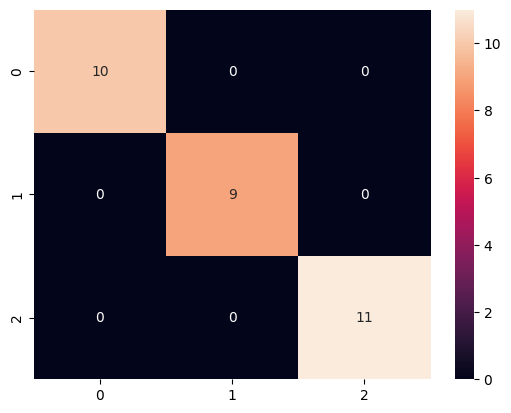

In [22]:
cm = confusion_matrix(y_test, y_test_predicted)
sns.heatmap(cm, annot = True)

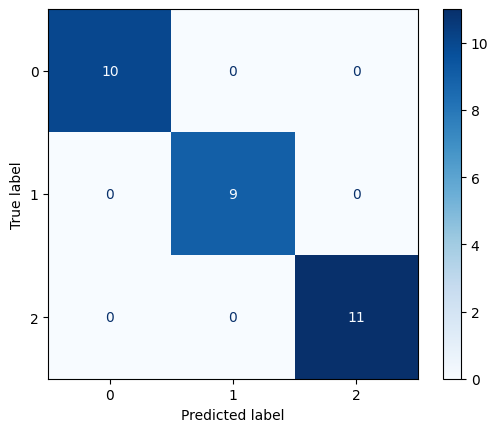

In [23]:
conf_matrix = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
conf_matrix.plot(cmap=plt.cm.Blues)
plt.rcParams['figure.figsize'] = (8, 6)
plt.show()

In [24]:
print(classification_report(y_test,y_test_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [25]:
tp, fn, fp, tn = confusion_matrix(y_test,y_test_predicted,labels=[1,0]).reshape(-1)

In [26]:
print('\nAccuracy: {:.2f}'.format(accuracy_score(y_test,y_test_predicted)))
print('Error Rate: ',(fp+fn)/(tp+tn+fn+fp))
print('Sensitivity (Recall or True positive rate) :',tp/(tp+fn))
print('Specificity (True negative rate) :',tn/(fp+tn))
print('Precision (Positive predictive value) :',tp/(tp+fp))
print('False Positive Rate :',fp/(tn+fp))


Accuracy: 1.00
Error Rate:  0.0
Sensitivity (Recall or True positive rate) : 1.0
Specificity (True negative rate) : 1.0
Precision (Positive predictive value) : 1.0
False Positive Rate : 0.0


<Axes: >

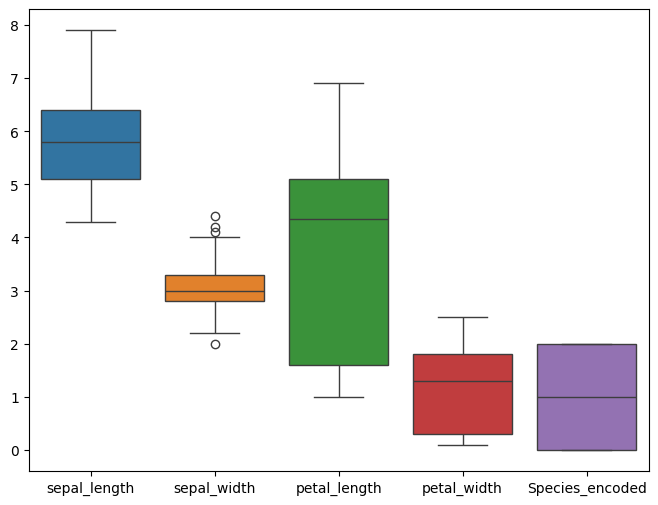

In [27]:
sns.boxplot(df) # Sepal Width feature contains outliers above around value 4 which need to be removed using IQR

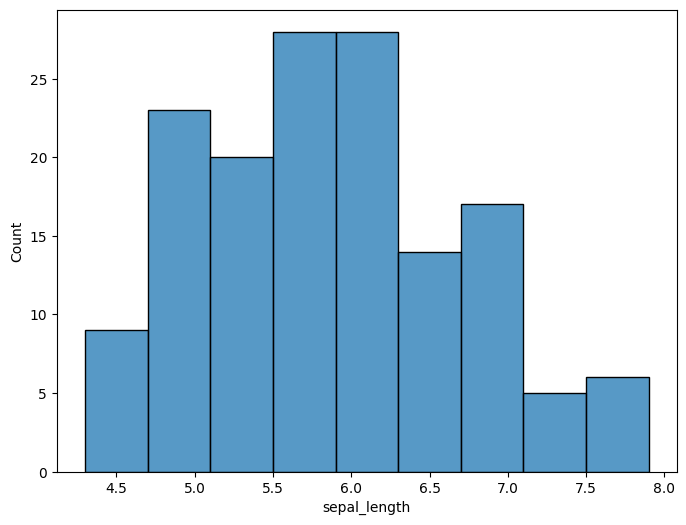

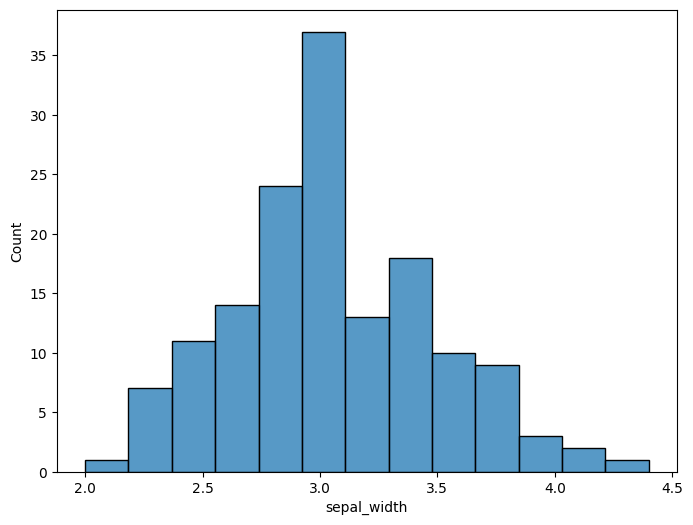

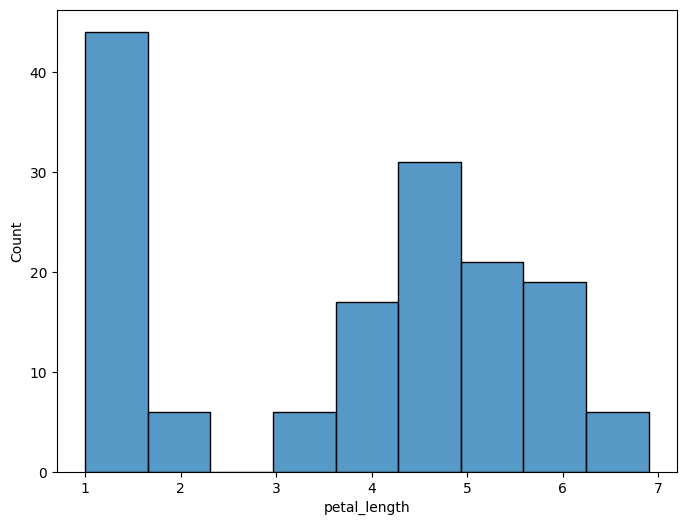

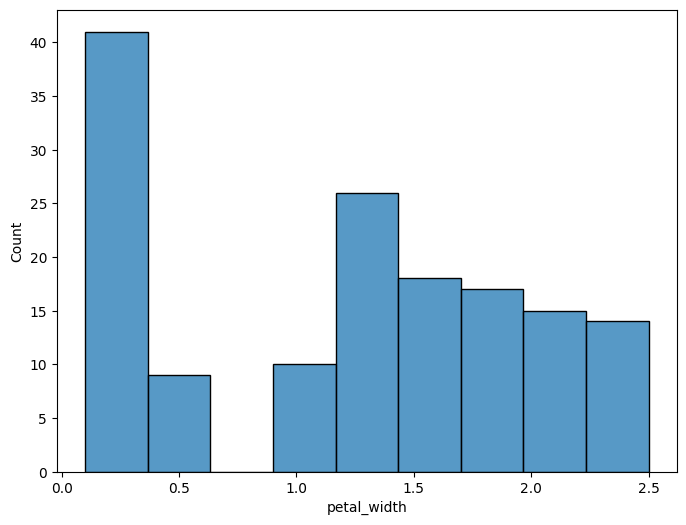

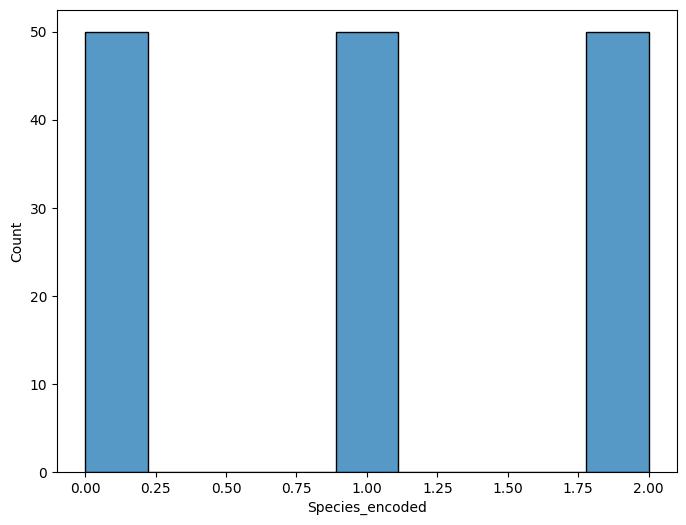

In [28]:
for col in df.columns:
  sns.histplot(df[col])
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.show()
# plt.show()

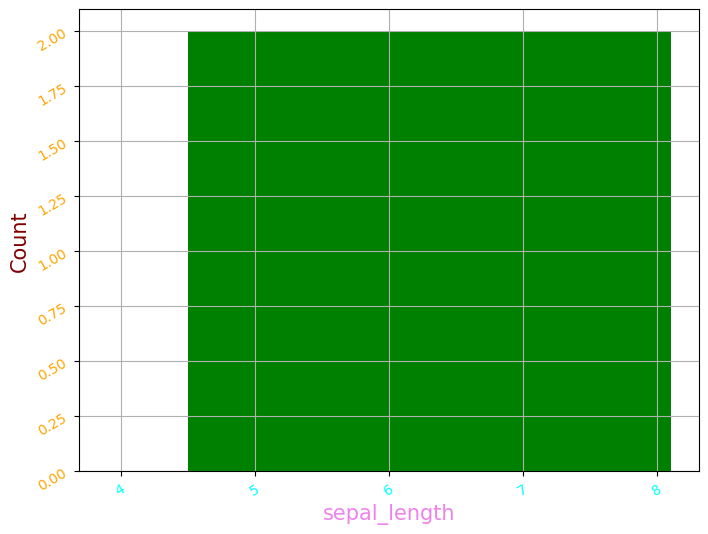

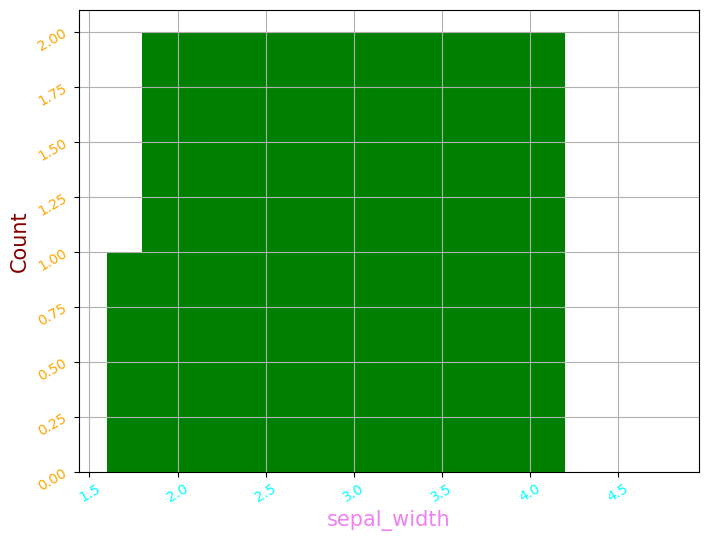

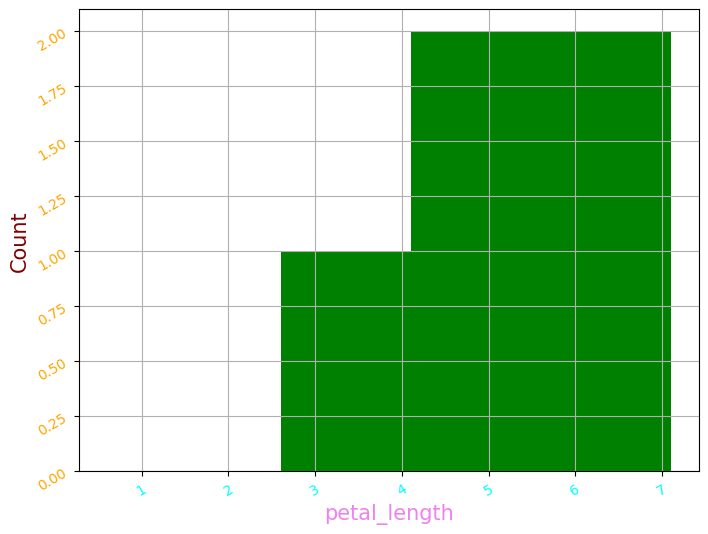

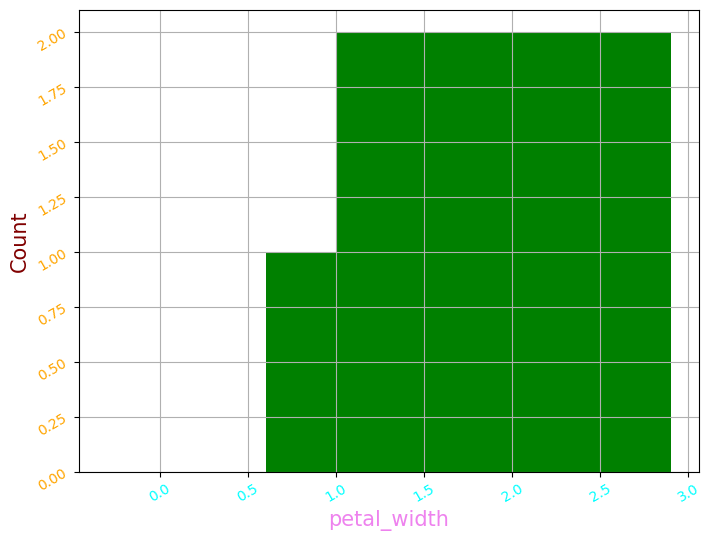

In [29]:
for col in X_train.columns:
  plt.bar(X_train[col], y_train, color = 'green')
  plt.xlabel(col, color = 'Violet', fontsize = 15)
  plt.xticks(color = 'cyan', rotation = 30)
  plt.yticks(color = 'orange', rotation = 30)
  plt.ylabel('Count', color = 'Maroon', fontsize = 15)
  plt.grid(True)
  plt.show()

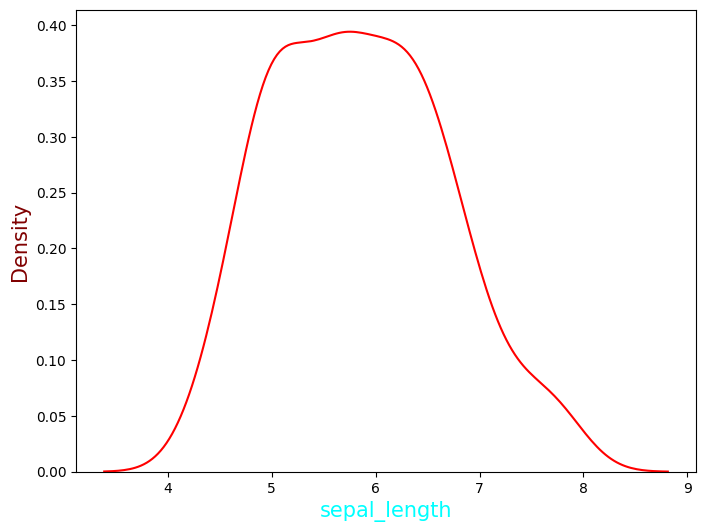

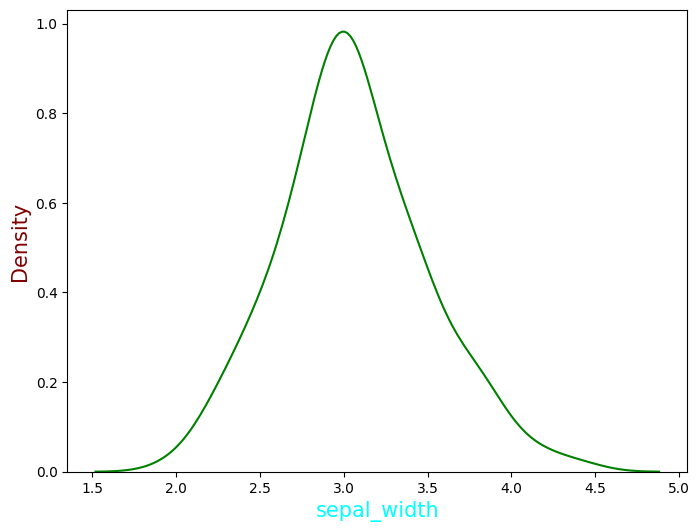

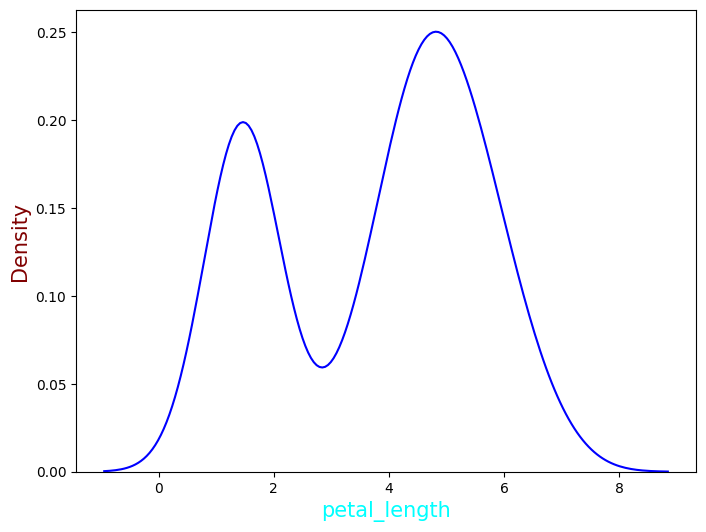

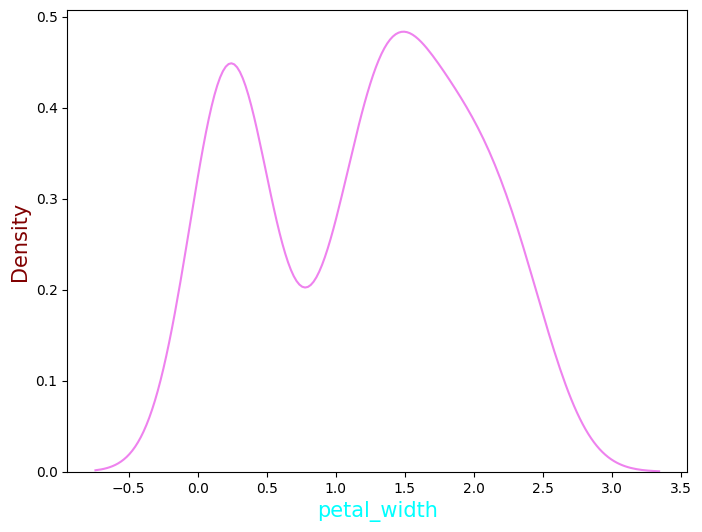

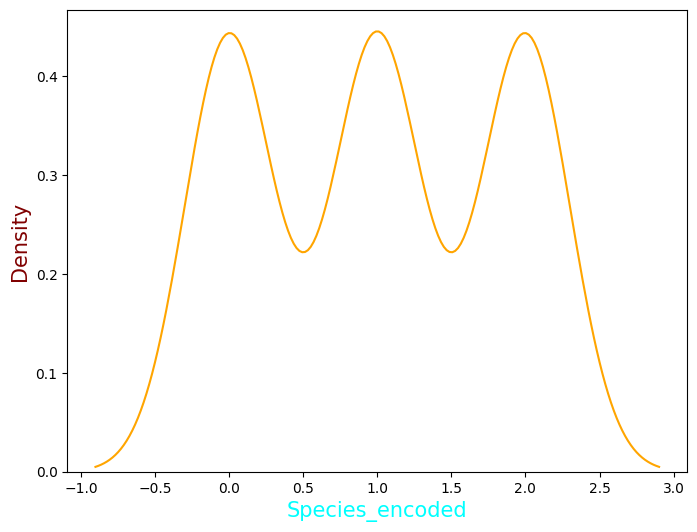

In [30]:
colors = ['Red', 'Green', 'Blue', 'Violet', 'Orange']
for col, color in zip(df.columns, colors):
    sns.kdeplot(df[col], color=color)
    plt.xlabel(col, fontsize = 15, color = 'cyan')
    plt.ylabel('Density', fontsize = 15, color = 'maroon')
    plt.show()

In [31]:
def printCentralMeasures(df):
  for col in df.columns:
    print("***** For {} *****".format(col))
    print("Mean = ", df[col].mean())
    print()
    print("Median = ", df[col].median())
    print()
    print("Mode = ", df[col].mode())
    print()

    print("Minimum = ", df[col].min())
    print()
    print("Maximum = ", df[col].max())
    print()
    print()
    print()

printCentralMeasures(df)

***** For sepal_length *****
Mean =  5.843333333333334

Median =  5.8

Mode =  0    5.0
Name: sepal_length, dtype: float64

Minimum =  4.3

Maximum =  7.9



***** For sepal_width *****
Mean =  3.0573333333333337

Median =  3.0

Mode =  0    3.0
Name: sepal_width, dtype: float64

Minimum =  2.0

Maximum =  4.4



***** For petal_length *****
Mean =  3.7580000000000005

Median =  4.35

Mode =  0    1.4
1    1.5
Name: petal_length, dtype: float64

Minimum =  1.0

Maximum =  6.9



***** For petal_width *****
Mean =  1.1993333333333336

Median =  1.3

Mode =  0    0.2
Name: petal_width, dtype: float64

Minimum =  0.1

Maximum =  2.5



***** For Species_encoded *****
Mean =  1.0

Median =  1.0

Mode =  0    0
1    1
2    2
Name: Species_encoded, dtype: int64

Minimum =  0

Maximum =  2





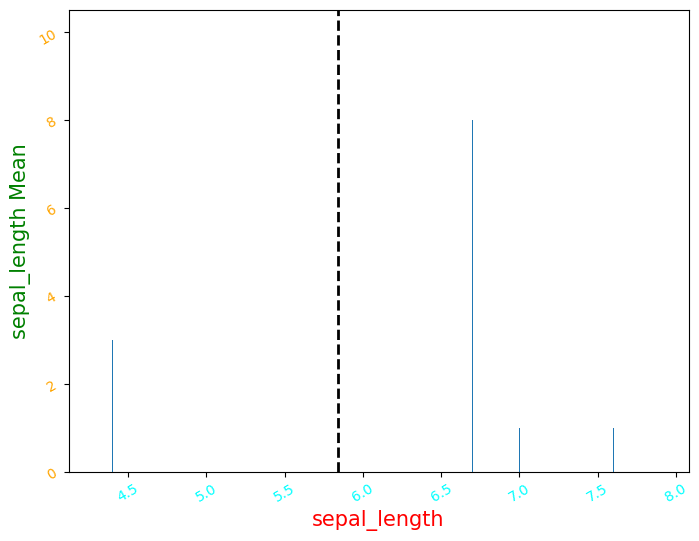

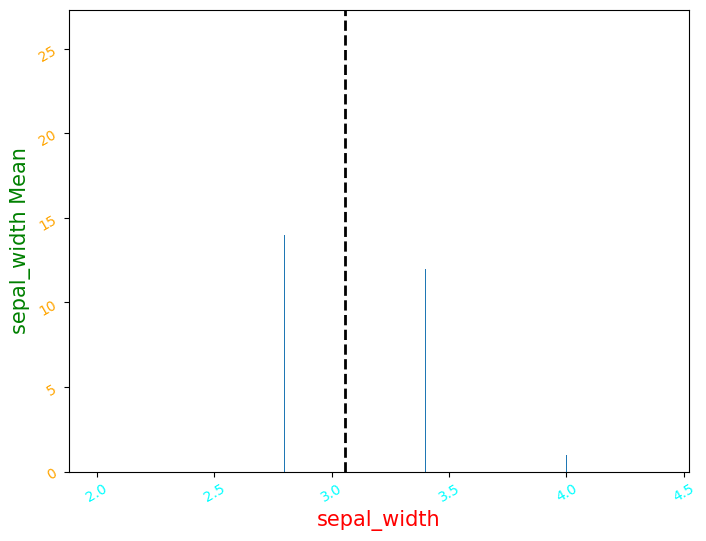

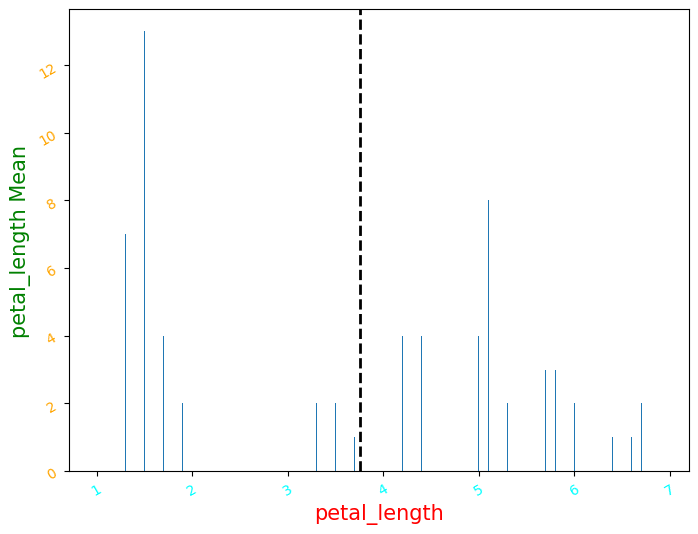

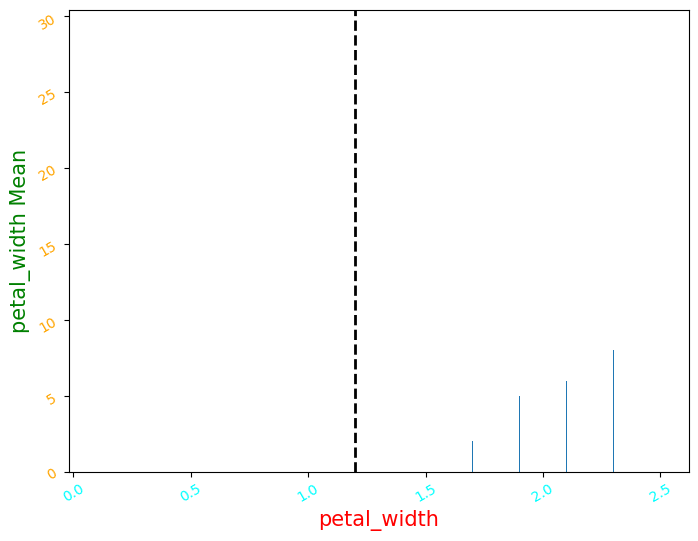

In [32]:
for col in X_train.columns:
  plt.hist(df[col], 1500)
  plt.axvline(df[col].mean(), color='k', linestyle='dashed', linewidth=2)
  plt.xlabel(col, color='r', fontsize=15)
  plt.ylabel("{} Mean".format(col), color='g', fontsize=15)
  plt.xticks(rotation=30, color='cyan')
  plt.yticks(rotation=30, color='orange')
  plt.show()

In [33]:
cross_val_score(model, X_train, y_train, scoring = 'accuracy', cv = 10)

array([0.91666667, 1.        , 1.        , 1.        , 0.75      ,
       0.91666667, 1.        , 1.        , 0.91666667, 0.91666667])

In [34]:
cross_val_score(model, X_test, y_test, scoring = 'accuracy', cv = 10)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


array([1.        , 1.        , 1.        , 1.        , 1.        ,
       0.66666667, 1.        , 1.        , 1.        , 1.        ])

Model Save -

Machine learning models often take hours or days to run, especially on large datasets with many features. If your machine goes off, you’ll lose your model and you’ll need to re-train it from scratch.

Pickle is a useful Python tool that allows you to save your ML models, to minimise lengthy re-training and allow you to share, commit, and re-load pre-trained machine learning models. Most data scientists working in ML will use Pickle or Joblib to save their ML model for future use.

In [35]:
naive = joblib.load('/content/drive/MyDrive/TE/SEM_6/Lab_Work/DSBDAL/Assignment_10/naive_bayes_iris.pkl')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator GaussianNB from version 1.3.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [36]:
cross_val_score(naive, X_train, y_train, scoring = 'accuracy', cv = 10)

array([0.91666667, 1.        , 1.        , 1.        , 0.75      ,
       0.91666667, 1.        , 1.        , 0.91666667, 0.91666667])

In [37]:
cross_val_score(naive, X_test, y_test, scoring = 'accuracy', cv = 10)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


array([1.        , 1.        , 1.        , 1.        , 1.        ,
       0.66666667, 1.        , 1.        , 1.        , 1.        ])

Last Step is to train the model after removing very few outliers from sepal width feature

In [38]:
Q1 = df['sepal_width'].quantile(0.25)
Q3 = df['sepal_width'].quantile(0.75)
IQR = Q3 - Q1

new_df = df[(df['sepal_width'] > Q1 - 1.5 * IQR) & (df['sepal_width'] < Q3 + 1.5 *IQR)]
new_df.head()

,sepal_length,sepal_width,petal_length,petal_width,Species_encoded
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<Axes: >

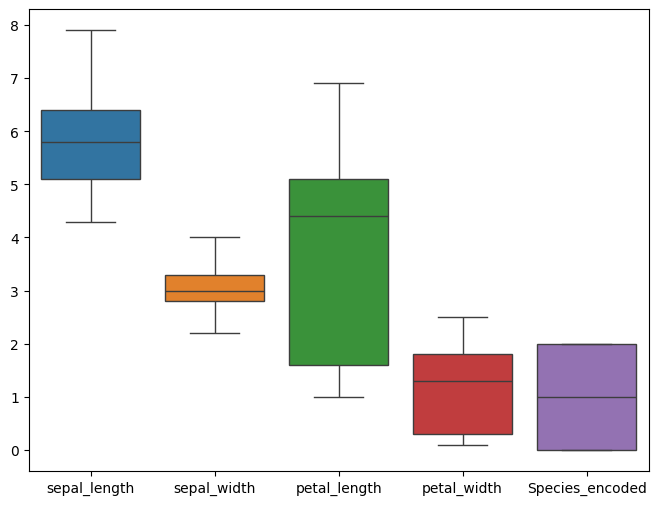

In [39]:
sns.boxplot(new_df)

In [40]:
X = df.drop(['Species_encoded'], axis = 1) # Features
X.shape

(150, 4)

In [41]:
y = df['Species_encoded']
y.shape

(150,)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [43]:
model.fit(X_train, y_train)

GaussianNB()

In [44]:
model.score(X_test, y_test)

1.0

In [45]:
y_test_predicted = model.predict(X_test)
print(y_test_predicted)

print()
print(y_test_predicted.shape)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]

(30,)


<Axes: >

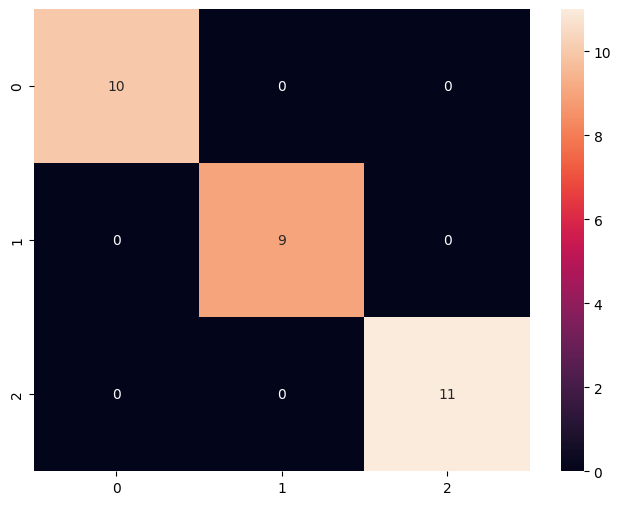

In [46]:
cm = confusion_matrix(y_test, y_test_predicted)
sns.heatmap(cm, annot = True)

In [47]:
print(classification_report(y_test,y_test_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [48]:
tp, fn, fp, tn = confusion_matrix(y_test,y_test_predicted,labels=[1,0]).reshape(-1)

In [49]:
print('\nAccuracy: {:.2f}'.format(accuracy_score(y_test,y_test_predicted)))
print('Error Rate: ',(fp+fn)/(tp+tn+fn+fp))
print('Sensitivity (Recall or True positive rate) :',tp/(tp+fn))
print('Specificity (True negative rate) :',tn/(fp+tn))
print('Precision (Positive predictive value) :',tp/(tp+fp))
print('False Positive Rate :',fp/(tn+fp))


Accuracy: 1.00
Error Rate:  0.0
Sensitivity (Recall or True positive rate) : 1.0
Specificity (True negative rate) : 1.0
Precision (Positive predictive value) : 1.0
False Positive Rate : 0.0


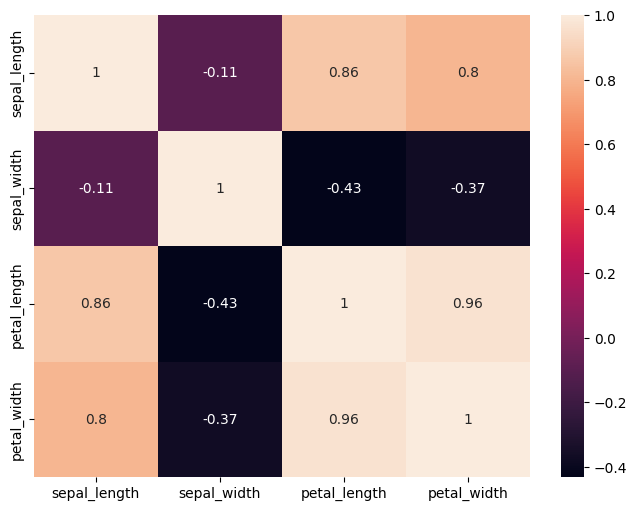

In [50]:
sns.heatmap(X_train.corr(), annot=True)
plt.show()

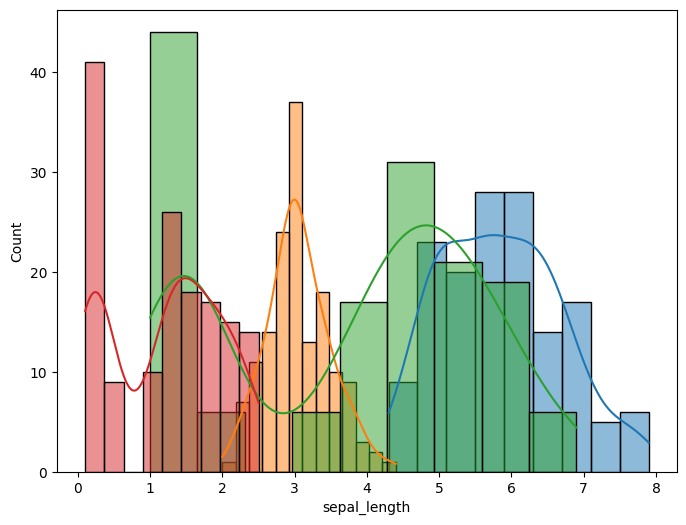

In [51]:
for col in X_train.columns:
  sns.histplot(df[col], kde=True)
  # plt.show()

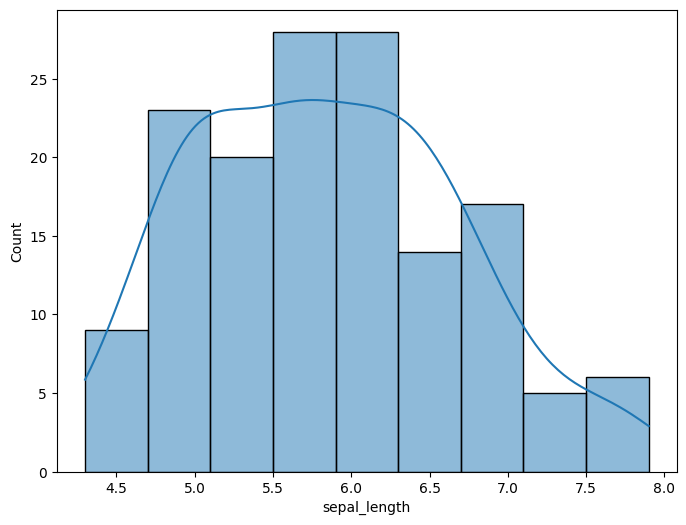

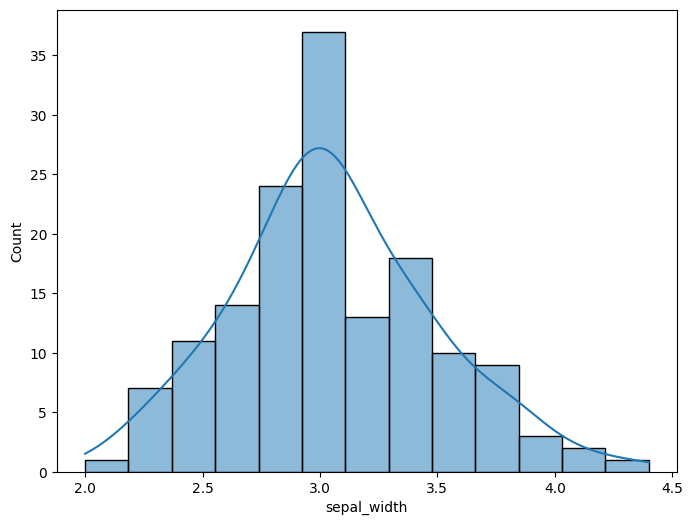

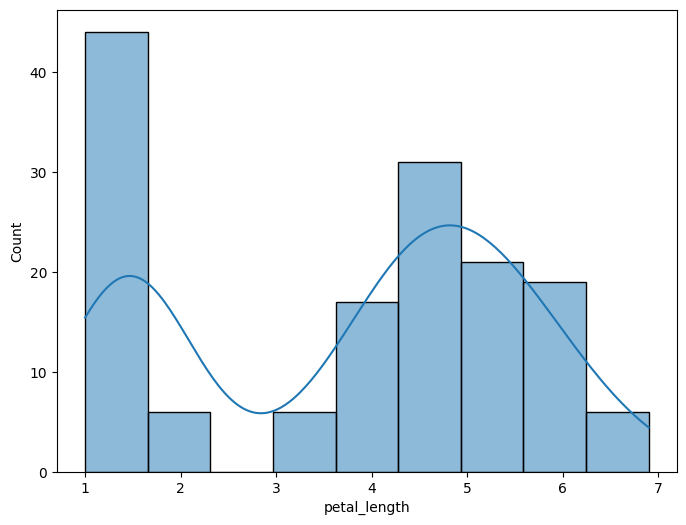

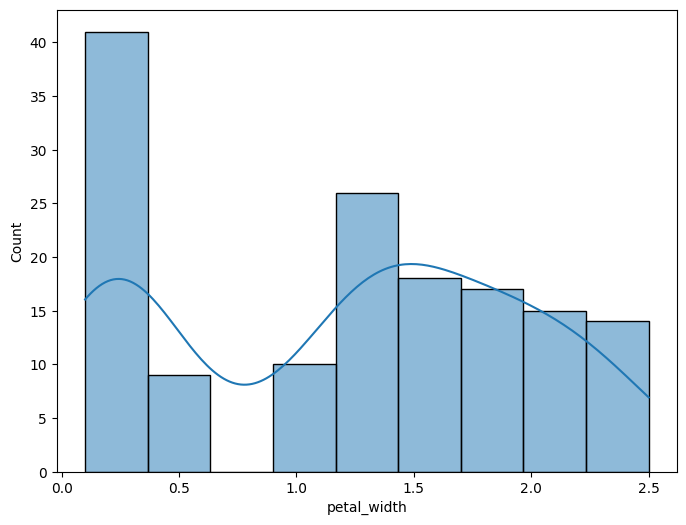

In [52]:
for col in X_train.columns:
  sns.histplot(df[col], kde=True)
  plt.show()